In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("/content/spam_or_not_spam.csv")

In [3]:
data.dropna()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0.0
1,martin a posted tassos papadopoulos the greek ...,0.0
2,man threatens explosion in moscow thursday aug...,0.0
3,klez the virus that won t die already the most...,0.0
4,in adding cream to spaghetti carbonara which ...,0.0
...,...,...
2530,suppliers of computers printers etc consumable...,1.0
2531,NUMBER fight the risk of cancer URL NUMBER sli...,1.0
2532,this is the bottom line if you can give away c...,1.0
2533,as seen on nbc cbs cnn and even oprah the heal...,1.0


In [6]:
data.isnull().sum()

,0
email,0
label,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
x=data.drop("label",axis=1)
y=data["label"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
model=LogisticRegression()

Before proceeding, I will address the missing value in the `label` column by dropping the row with the missing value to ensure the data is suitable for training the model.

Now, I will use TF-IDF vectorization to convert the email text into numerical features that the logistic regression model can understand.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Ensure missing values are dropped before vectorization and splitting
data.dropna(inplace=True)
x_vectorized = vectorizer.fit_transform(data['email'])
y = data['label']

Next, I will split the vectorized data into training and testing sets.

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)

Finally, I will train the Logistic Regression model using the vectorized training data and make predictions.

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [23]:
import matplotlib.pyplot as plt

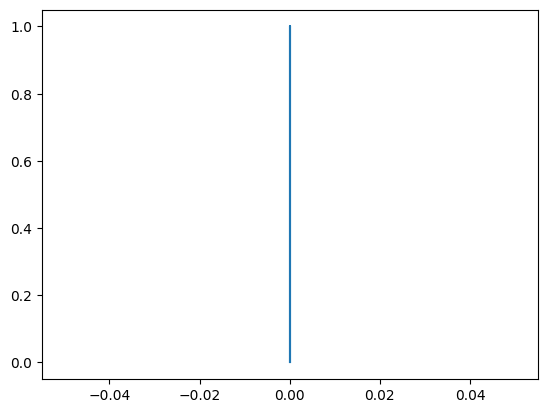

In [24]:
plt.plot(y_pred,y_test)

In [26]:
y_pred = model.predict(vectorizer.transform(["important"]))  #converts text to numeric format
print(y_pred)

[0.]
